In [1]:
%matplotlib inline

In [2]:
import numpy as np

from msslib.utils import *
from msslib.labels import mss_labels
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import metrics

In [3]:
base_path = "/home/finlay/Dropbox/rewritten_tests/"
results_paths = sorted(list(filter(lambda x: 'results' in x, listpaths(base_path))))

In [4]:
scores = []
for path in results_paths:
    results = np.load(path)
    p,r,f,_ = metrics.precision_recall_fscore_support(results[0], results[1], average='weighted')
    
    scores.append({'label': only_basename(path),
                    'precision': p,
                    'recall': r,
                    'fscore': f,
                    #'c_matrix': metrics.confusion_matrix(results[0], results[1])
                  })


In [ ]:
from msslib.evaluate import *

In [ ]:
def plot_confusion_matrix(plt, score):
    c_m = normalise_confusion_matrix(score['c_matrix'])
    plt.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)
    #ax.title(score['label'][0])
    #tick_marks = np.arange(len(mss_labels))
    #ax.xticks(tick_marks, mss_labels)
    #ax.yticks(tick_marks, mss_labels)
    #ax.tight_layout()
    #ax.ylabel('True label')
    #ax.xlabel('Predicted label')

In [ ]:
plot(scores[0])

In [ ]:
mss_labels = ['background', 'page', 'marginalia', 'note', 'main text']

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(9.2,10),sharex='col', sharey='row')

tick_marks = np.arange(len(mss_labels))
axes[0][0].set_yticklabels(['']+mss_labels)
axes[1][0].set_yticklabels(['']+mss_labels)
axes[2][0].set_yticklabels(['']+mss_labels)
axes[3][0].set_yticklabels(['']+mss_labels)
axes[3][0].set_xticklabels(['']+mss_labels,ha='right', rotation=45)
axes[3][1].set_xticklabels(['']+mss_labels,ha='right', rotation=45)
axes[3][2].set_xticklabels(['']+mss_labels,ha='right', rotation=45)

for a, s in zip(axes.flat, scores):
    a.set_title(s['label'][0])
    c_m = normalise_confusion_matrix(s['c_matrix'])
    im = a.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)
    
cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat], aspect=70)
plt.colorbar(im, cax=cax, **kw)

In [ ]:
fig.savefig('c_matrix.png')

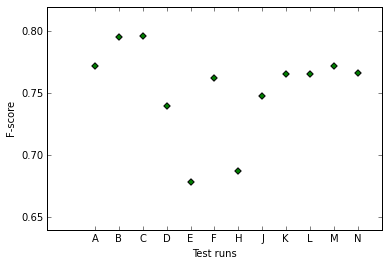

In [29]:
fig = plt.figure()
fs = [s['fscore'] for s in scores]
labels = [s['label'][0] for s in scores]
del fs[6]
del labels[6]
x = range(len(fs))
plt.scatter(np.arange(len(fs)), fs, c='green', marker='D')
plt.xticks(x, labels)
plt.ylabel('F-score')
plt.xlabel('Test runs')

fig.savefig('scatter.png')

In [30]:
scores

[{'fscore': 0.77211869107065434,
  'label': 'A_labels_and_results',
  'precision': 0.86181737046866103,
  'recall': 0.71927710555791757},
 {'fscore': 0.79565416629273333,
  'label': 'B_labels_and_results',
  'precision': 0.87712605890569462,
  'recall': 0.74721792628002726},
 {'fscore': 0.79605138582056734,
  'label': 'C_labels_and_results',
  'precision': 0.84978144124516208,
  'recall': 0.76267173808685929},
 {'fscore': 0.74021498137174302,
  'label': 'D_labels_and_results',
  'precision': 0.80138417540139317,
  'recall': 0.70332069312504641},
 {'fscore': 0.67885461692599847,
  'label': 'E_labels_and_results',
  'precision': 0.7445872814324247,
  'recall': 0.63557055973609744},
 {'fscore': 0.76238637709107027,
  'label': 'F_labels_and_results',
  'precision': 0.88491595866462591,
  'recall': 0.69998865900239371},
 {'fscore': 0.16847568524110187,
  'label': 'G_labels_and_results',
  'precision': 0.42699726179353026,
  'recall': 0.13361383062358348},
 {'fscore': 0.6870740307322496,
  '